# Tests for PSO clustering

In [1]:
import pandas as pd
import numpy as np
from pso import pso_clustering
import matplotlib.pyplot as plt

Load data (should take about 30-60 seconds).

In [2]:
print("Loading data...")
tf_idf = pd.read_csv('data/tfidf.csv')
print("Done.")

tf_idf = np.array(tf_idf)

Loading data...
Done.


Define distance functions. Other functions could be studied in future works (cosine distance was left for future experiments).

In [3]:
def euc_distance(mp, mj):
    return np.linalg.norm(mp-mj)

def cos_distance(mp, mj):
    return np.dot(mp, mj)/(np.linalg.norm(mp)*np.linalg.norm(mj))

## Tests

In [4]:
for k in [3,5,8,10,12]:

        global_best, convergence, particles = pso_clustering.pso_clustering(
                k=k,
                data=tf_idf,
                distance=euc_distance,
                n_particles=5
        )

        with open("results/csv/pso/best_part_k{}.csv".format(k), "a+") as f:
                f.write(str(k) + ";")
                np.savetxt(f, global_best, delimiter=";")

        # with open("cluster_assignments.csv", "a+") as f:
        #     f.write(str(k) + ";")
        #     np.savetxt(f, cluster_assignments, delimiter=";")

        with open("results/csv/pso/convergence_k{}.csv".format(k), "a+") as f:
                for entry in convergence:
                        f.write(str(entry[0]) + ";" + str(entry[1]) + "\n")


  5%|▌         | 5/99 [01:00<18:52, 12.04s/it]


KeyboardInterrupt: 

Plot the dumped results.

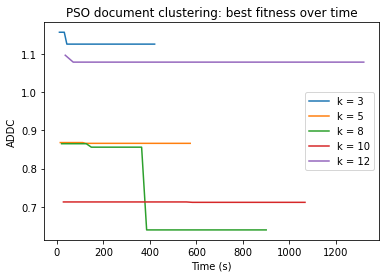

In [2]:
legend = []
for k in [3,5,8,10,12]:
    with open("results/csv/pso/convergence_k{}.csv".format(k), "r") as f:
        lines = f.readlines()
    
    time = []
    fitness = []
    legend.append("k = {}".format(k))

    for step in lines[:41]:
        split_line = step.strip().split(";")
        time.append(float(split_line[0]))
        fitness.append(round(float(split_line[1]), 3))
        
    plt.plot(time, fitness)
        
plt.xlabel("Time (s)")
plt.ylabel("ADDC")
plt.title("PSO document clustering: best fitness over time")
plt.legend(legend)
plt.savefig("results/plots/k_tests_pso.png")
plt.show()